In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
p9.options.dpi=300
plt.rcParams['svg.fonttype']='none'

In [4]:
df_nFeature_OAK=pd.read_csv(OAK_data_dir_1+'ArchRanalysisMarch3rd/OAKBarcodes_nFeature.csv',header=None)

In [5]:
df_nFeature_OAK.columns=['GEX_barcode','nFeature']

In [6]:
df_ali1=pd.read_csv(OAK_data_dir_1+'GEXandATAC_NGS4846/Multiome3xSSC1/outs/per_barcode_metrics.csv',header=0)  

In [7]:
df_ali1['GEX_barcode_rename']=df_ali1['gex_barcode']

In [8]:
df_ali2=pd.read_csv(OAK_data_dir_1+'GEXandATAC_NGS4846/Multiome3xSSC2/outs/per_barcode_metrics.csv',header=0)  

In [9]:
df_ali2['GEX_barcode_rename']=df_ali2['gex_barcode'].str.replace('-1','-2')

In [10]:
df_ali3to13=pd.DataFrame()
for i in range(3,14):
    df_temp=pd.read_csv(OAK_data_dir_2+'Multiome_'+str(i)+'/outs/per_barcode_metrics.csv',header=0)  
    df_temp['GEX_barcode_rename']=df_temp['gex_barcode'].str.replace('-1','-'+str(i))
    df_ali3to13=pd.concat([df_ali3to13,df_temp],ignore_index=True)

In [11]:
df_ali1to13=pd.concat([df_ali1,df_ali2,df_ali3to13],ignore_index=True)

In [12]:
df_gex_metric_OAK=df_nFeature_OAK.reset_index().merge(df_ali1to13,how='left',left_on='GEX_barcode',right_on='GEX_barcode_rename').set_index('GEX_barcode')

In [13]:
df_gex_metric_OAK['exp']="OAK"

In [14]:
df_nFeature_Chromium=pd.read_csv(OAK_data_dir_1+'ArchRanalysisMarch3rd/ControlBarcodes_nFeature.csv',header=None)

In [15]:
df_nFeature_Chromium.columns=['GEX_barcode','nFeature']

In [16]:
df_chromium=pd.read_csv(OAK_data_dir_1+'10xNonOAKcontrolNGS4905/NonOAKcontrol/outs/per_barcode_metrics.csv',header=0)

In [17]:
df_chromium['GEX_barcode_rename']=df_chromium['gex_barcode']

In [18]:
df_gex_metric_Chromium=df_nFeature_Chromium.reset_index().merge(df_chromium,how='left',left_on='GEX_barcode',right_on='GEX_barcode_rename').set_index('GEX_barcode')

In [19]:
df_gex_metric_Chromium['exp']='Chromium'

In [20]:
df_compare=pd.concat([df_gex_metric_OAK,df_gex_metric_Chromium],ignore_index=True)

In [26]:
#df_compare[df_compare['exp']=='OAK'][['GEX_barcode_rename','gex_raw_reads','nFeature']].to_csv('OAKBarcodes_GEX_nReads.csv',index=False,header=True)

In [27]:
#df_compare[df_compare['exp']=='Chromium'][['GEX_barcode_rename','gex_raw_reads','nFeature']].to_csv('ControlBarcodes_GEX_nReads.csv',index=False,header=True)

In [21]:
df_compare[df_compare['exp']=="OAK"].gex_raw_reads.median()

17219.0

In [22]:
df_compare[df_compare['exp']=="Chromium"].gex_raw_reads.median()

17977.5

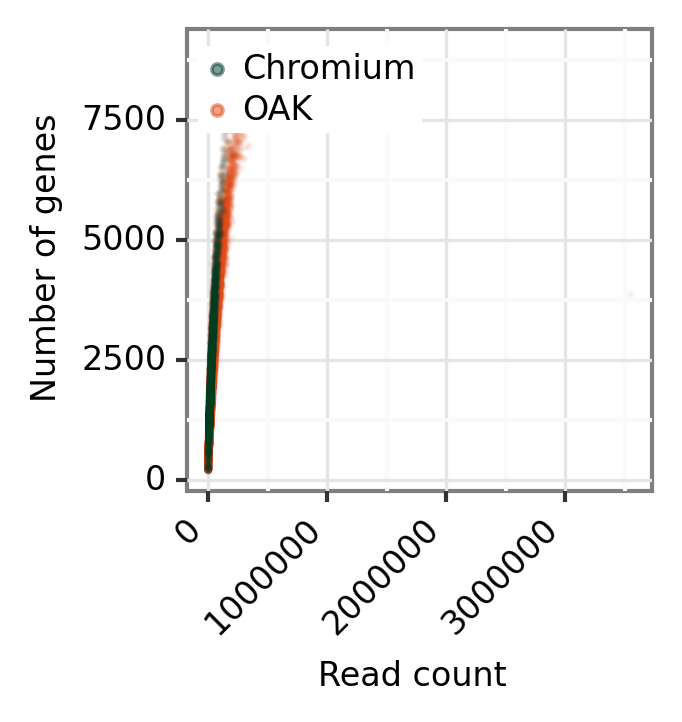

<ggplot: (2932263771929)>

In [23]:
plot=p9.ggplot(data=df_compare,
               mapping=p9.aes(x='gex_raw_reads',y='nFeature',color="exp")
              )
plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.labels.ylab('Number of genes') \
+ p9.labels.xlab('Read count') \
+ p9.theme(figure_size=(2,2)) # inch

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 172 rows containing missing values.


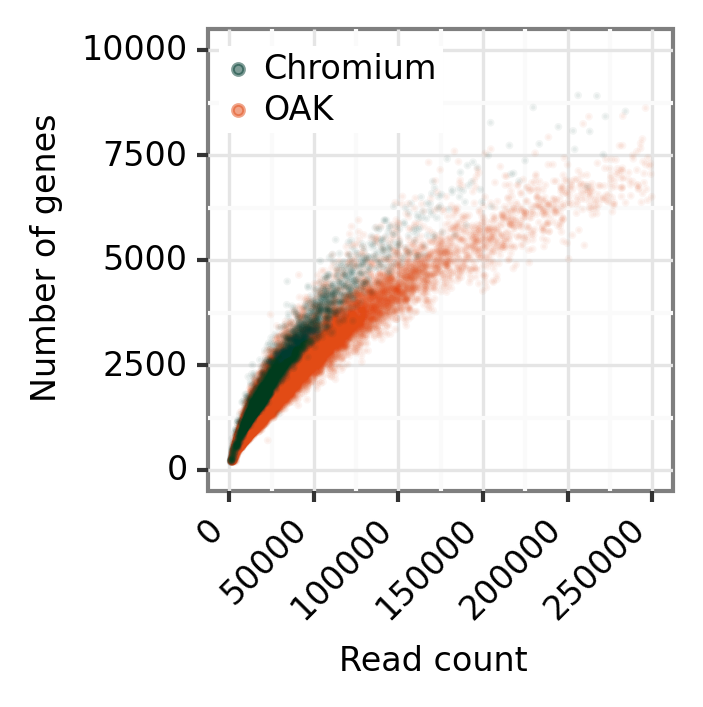

<ggplot: (2932043129944)>

In [24]:
plot=p9.ggplot(data=df_compare,
               mapping=p9.aes(x='gex_raw_reads',y='nFeature',color="exp")
              )
plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.labels.ylab('Number of genes') \
+ p9.labels.xlab('Read count') \
+p9.xlim(0,250000) \
+p9.ylim(0,10000) \
+ p9.theme(figure_size=(2,2)) # inch

In [29]:
plot=p9.ggplot(data=df_compare,
               mapping=p9.aes(x='gex_raw_reads',y='nFeature',color="exp")
              )
plotsave=plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.labels.ylab('Number of genes') \
+ p9.labels.xlab('Read count') \
+p9.xlim(0,250000) \
+p9.ylim(0,10000) \
+ p9.theme(figure_size=(2,2)) # inch

fig=plotsave.draw()
fig.set_size_inches(2, 2)
points = fig.axes[0].collections[0]
points.set_rasterized(True)
fig.savefig('retinal_GEX_reads.svg',format='svg',dpi=300,bbox_inches='tight')  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 172 rows containing missing values.


In [27]:
df_compare[['GEX_barcode_rename','gex_raw_reads','nFeature','exp']].to_csv(data_dir+'SupFig2a.csv',header=True,index=False)

In [28]:
df_nFrag_OAK=pd.read_csv(OAK_data_dir_1+'ArchRanalysisMarch3rd/OAKArchRBarcodes_nFrags.csv',header=0)

In [29]:
df_nFrag_OAK.columns=['GEX_barcode','nFrag']

In [30]:
df_ATAC_metric_OAK=df_nFrag_OAK.reset_index().merge(df_ali1to13,how='left',left_on='GEX_barcode',right_on='GEX_barcode_rename').set_index('GEX_barcode')

In [31]:
df_ATAC_metric_OAK['exp']="OAK"

In [32]:
df_nFrag_Chromium=pd.read_csv(OAK_data_dir_1+'ArchRanalysisMarch3rd/ControlArchRBarcodes_nFrags.csv',header=0)

In [33]:
df_nFrag_Chromium.columns=['GEX_barcode','nFrag']

In [34]:
df_ATAC_metric_Chromium=df_nFrag_Chromium.reset_index().merge(df_chromium,how='left',left_on='GEX_barcode',right_on='GEX_barcode_rename').set_index('GEX_barcode')

In [35]:
df_ATAC_metric_Chromium['exp']='Chromium'

In [36]:
df_compare_ATAC=pd.concat([df_ATAC_metric_OAK,df_ATAC_metric_Chromium],ignore_index=True)

In [40]:
#df_compare_ATAC[df_compare_ATAC['exp']=='OAK'][['GEX_barcode_rename','atac_raw_reads','nFrag']].to_csv('OAKBarcodes_ATAC_nReads.csv',index=False,header=True)

In [41]:
#df_compare_ATAC[df_compare_ATAC['exp']=='Chromium'][['GEX_barcode_rename','atac_raw_reads','nFrag']].to_csv('ControlBarcodes_ATAC_nReads.csv',index=False,header=True)

In [37]:
df_compare_ATAC[df_compare_ATAC['exp']=="OAK"].atac_raw_reads.median()

27027.0

In [38]:
df_compare_ATAC[df_compare_ATAC['exp']=="Chromium"].atac_raw_reads.median()

24524.0

In [39]:
df_compare_ATAC['ATACfragmentX1000']=df_compare_ATAC['nFrag']/1000 

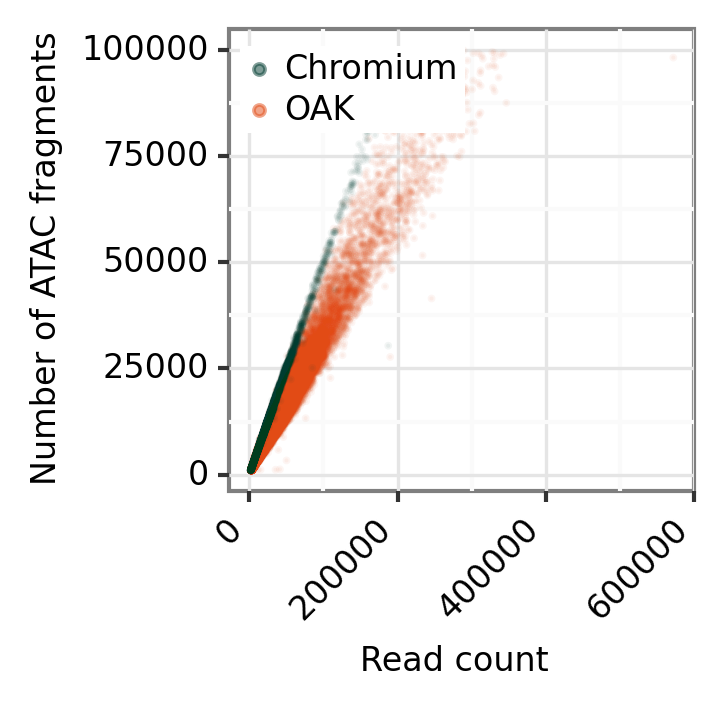

<ggplot: (2932263975750)>

In [40]:
plot=p9.ggplot(data=df_compare_ATAC,
               mapping=p9.aes(x='atac_raw_reads',y='nFrag',color="exp")
              )
plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.labels.ylab('Number of ATAC fragments') \
+ p9.labels.xlab('Read count') \
+ p9.theme(figure_size=(2,2)) # inch

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


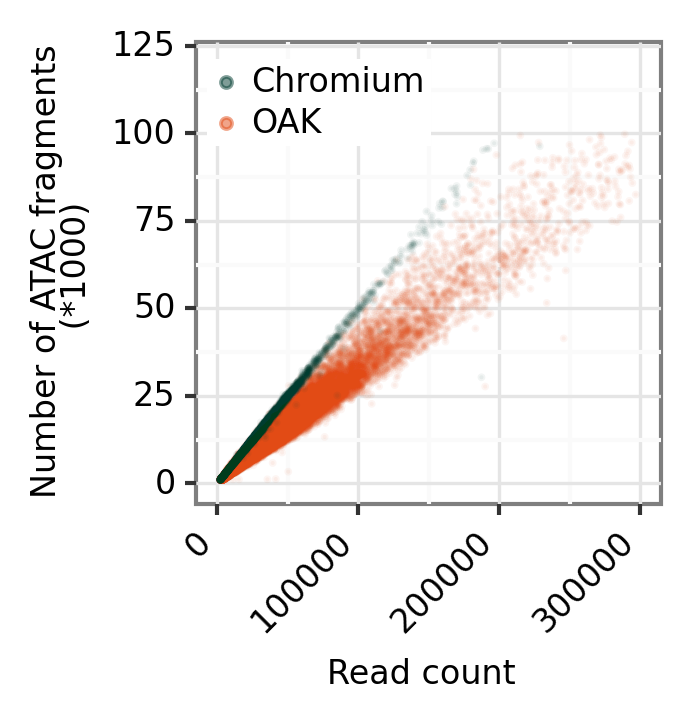

<ggplot: (2932263763137)>

In [41]:
plot=p9.ggplot(data=df_compare_ATAC,
               mapping=p9.aes(x='atac_raw_reads',y='ATACfragmentX1000',color="exp")
              )
plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.xlim(0,300000) \
+ p9.ylim(0,120) \
+ p9.labels.ylab('Number of ATAC fragments\n (*1000)') \
+ p9.labels.xlab('Read count') \
+ p9.theme(figure_size=(2,2)) # inch

In [43]:
plot=p9.ggplot(data=df_compare_ATAC,
               mapping=p9.aes(x='atac_raw_reads',y='ATACfragmentX1000',color="exp")
              )
plotsave=plot+ p9.geom_point(alpha=0.05,size=0.05) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.theme(text=p9.element_text(size=8),legend_position=(0.33,0.78),legend_title=p9.element_blank(),legend_direction='vertical',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :1,'alpha':0.5 })) \
+ p9.scale_color_manual(values = {'Chromium':'#003C30','OAK':'#E24B15'}) \
+ p9.xlim(0,300000) \
+ p9.ylim(0,120) \
+ p9.labels.ylab('Number of ATAC fragments\n (*1000)') \
+ p9.labels.xlab('Read count') \
+ p9.theme(figure_size=(2,2)) # inch

fig=plotsave.draw()
fig.set_size_inches(2, 2)
points = fig.axes[0].collections[0]
points.set_rasterized(True)
fig.savefig('retinal_ATAC_reads.svg',format='svg',dpi=300,bbox_inches='tight')  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 27 rows containing missing values.


In [42]:
df_compare_ATAC[['GEX_barcode_rename','atac_raw_reads','nFrag','ATACfragmentX1000','exp']].to_csv(data_dir+'SupFig2b.csv',header=True,index=False)